In [89]:
import pandas as pd
import numpy as np

In [90]:
print(dir(pd))

['ArrowDtype', 'BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt8Dtype', '__all__', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_built_with_meson', '_config', '_is_numpy_dev', '_libs', '_pandas_datetime_CAPI', '_pandas_parser_CAPI', '_testing', '_typing', '_version_meson', 'annotations', 'api', 'array', 'arrays', 'bdate_range', 'compat', 'conca

In [91]:
response_data=pd.read_csv(r"D:\Internship on I.studio\Istudio\Project\Istudio dataset/Retail_Data_Response.csv")
response_data


,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [92]:
transaction_data=pd.read_csv(r"D:\Internship on I.studio\Istudio\Project\Istudio dataset/Retail_Data_Transactions.csv")
transaction_data

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


### Merging the two tables

In [93]:
merge_data=transaction_data.merge(response_data, on='customer_id', how='left')
merge_data

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


#### 1st -- Finding the null value 

In [8]:
merge_data.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

 Note  31 Nan means , No response get from the customers So we can fill will with 0.

In [94]:
merge_data['response'].fillna(0,inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17284\3212795833.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_data['response'].fillna(0,inplace=True)


#### 2nd -- Finding the Datatypes

In [12]:
merge_data.dtypes

customer_id     object
trans_date      object
tran_amount      int64
response       float64
dtype: object

In [13]:
merge_data.trans_date = pd.to_datetime(merge_data.trans_date,format='%d-%b-%y')   ## converting the dataype of date column

In [14]:
merge_data.dtypes  ## checking date datatype converted or not.

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response              float64
dtype: object

####  3.  Finding the duplicates values

In [16]:
merge_data.duplicated().sum()

np.int64(6)

 **Note** - I keep that 6 duplicates because customer can buy same item twice a day


####  4. Detecting the outliers

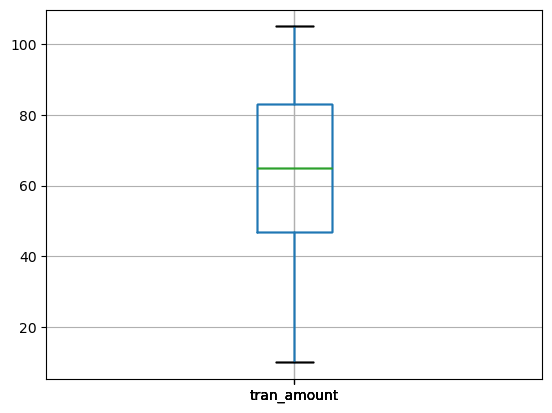

In [98]:
merge_data.boxplot(column='tran_amount')   ## No outlier Detected
plt.show()

In [99]:
merge_data.to_excel("D:\Internship on I.studio\Istudio\Project\Istudio dataset\clean_merge_file.xlsx") ## transfer into the excel

### Transfer the file into sql database 

In [21]:
!pip install pyodbc
!pip install sqlalchemy

In [22]:
import pyodbc 
from sqlalchemy import create_engine

In [23]:
server_name = 'DESKTOP-1FI0H2F\SQLEXPRESS01'
database_name = 'retail_data_project'
connection_string = f"mssql+pyodbc://@{server_name}/{database_name}?driver=ODBC+Driver+17+for+SQL+Server"

In [24]:
connection_string

'mssql+pyodbc://@DESKTOP-1FI0H2F\\SQLEXPRESS01/retail_data_project?driver=ODBC+Driver+17+for+SQL+Server'

connect to database

In [25]:
connection2 = create_engine(connection_string)
connection2

Engine(mssql+pyodbc://@DESKTOP-1FI0H2F\SQLEXPRESS01/retail_data_project?driver=ODBC+Driver+17+for+SQL+Server)

## Import the Sql data for the **VISUALIZATION**

####  1. Visualize the customer wise transaction amount 

In [28]:
query_1 = """select customer_id,sum(tran_amount) as Total_spent from clean_merge_data
group by customer_id
order by Total_spent desc"""
df_customer_spent=pd.read_sql(query_1,connection2)

In [29]:
df_customer_spent.head()

,customer_id,Total_spent
0,CS4424,2933
1,CS4320,2647
2,CS5752,2612
3,CS4660,2527
4,CS3799,2513


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

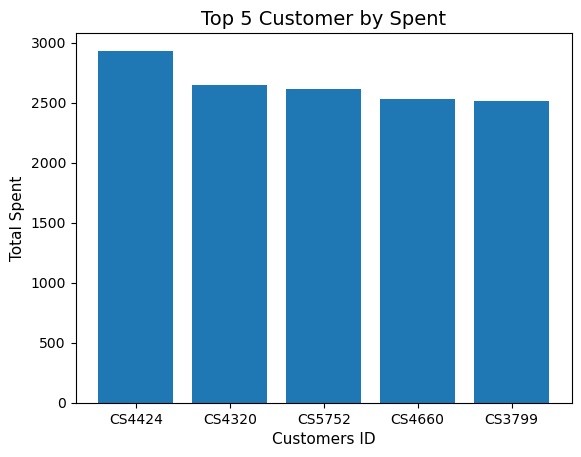

In [31]:
plt.bar(df_customer_spent.head().customer_id,df_customer_spent.head().Total_spent)
plt.xlabel('Customers ID',fontsize=11)
plt.title('Top 5 Customer by Spent',fontsize=14)
plt.ylabel('Total Spent',fontsize=11)
plt.show()

####  2. Visualize the Response wise Count 

In [32]:
query_2 = """select response,count(customer_id) as Total_count from clean_merge_data
group by response"""

In [33]:
df_cust_trans_count = pd.read_sql(query_2,connection2)

In [34]:
df_cust_trans_count

,response,Total_count
0,0.0,111158
1,1.0,13842


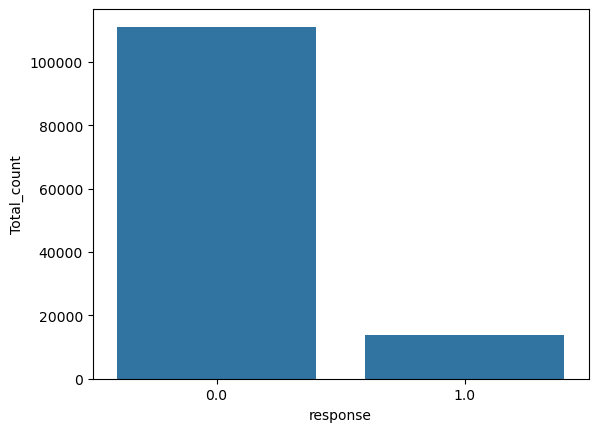

In [35]:
sns.barplot(x=df_cust_trans_count['response'],y=df_cust_trans_count['Total_count'])
plt.show()

### **Time Analysis**

#### YOY Analysis

In [37]:
query_3 = """with year_sales as (
select year(trans_date) as year_date,sum(tran_amount) as revenue,
LAG(sum(tran_amount)) over(order by year(trans_date)) as previous_year_revenue
from clean_merge_data
group by year(trans_date)
),

YOY_amt_diff as (
select year_date,revenue,previous_year_revenue, (revenue-previous_year_revenue) as Yoy_diff, 
Cast(revenue-previous_year_revenue as float)/previous_year_revenue * 100.0 as percent_YOY
from year_sales
)

select * from YOY_amt_diff"""

In [38]:
df_YOY = pd.read_sql(query_3,connection2)

In [39]:
df_YOY

,year_date,revenue,previous_year_revenue,Yoy_diff,percent_YOY
0,2011,1340339,NaN,NaN,NaN
1,2012,2116599,1340339.0,776260.0,57.915199
2,2013,2137368,2116599.0,20769.0,0.981244
3,2014,2094508,2137368.0,-42860.0,-2.005270
4,2015,435175,2094508.0,-1659333.0,-79.223044


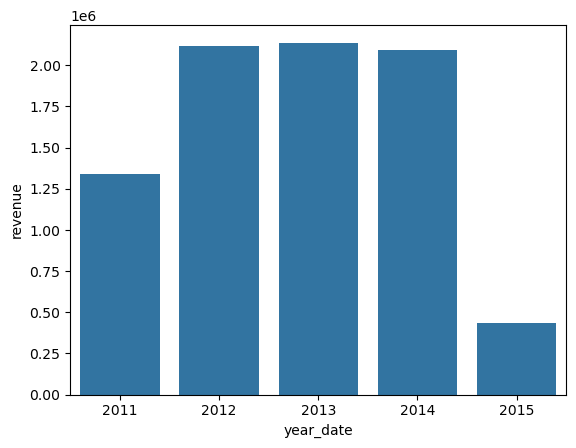

In [40]:
sns.barplot(x=df_YOY['year_date'],y=df_YOY['revenue'])
plt.show()

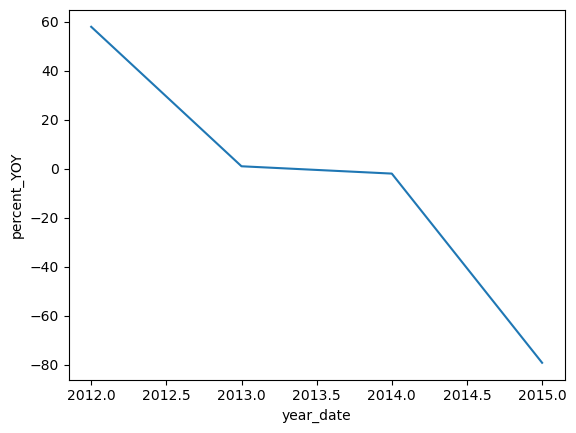

In [41]:
sns.lineplot(df_YOY,x=df_YOY['year_date'],y=df_YOY['percent_YOY'])
plt.show()

#### MOM Analysis

In [43]:
query_4 = """With previous_month_amt as (
select MONTH(trans_date) as Months,sum(tran_amount) as current_month_amount,
LAG(sum(tran_amount)) Over (order by Month(trans_date)) as prev_month_amount
from clean_merge_data
group by MONTH(trans_date)
),
MOM_diff as (
select *,(current_month_amount-prev_month_amount) as MOM_difference,CAST(current_month_amount-prev_month_amount as float)/prev_month_amount * 100 as MOM_percentage
from previous_month_amt)

select * from MOM_diff"""

In [44]:
df_MOM=pd.read_sql(query_4,connection2)
df_MOM

,Months,current_month_amount,prev_month_amount,MOM_difference,MOM_percentage
0,1,724107,NaN,NaN,NaN
1,2,645154,724107.0,-78953.0,-10.903499
2,3,636577,645154.0,-8577.0,-1.329450
3,4,515791,636577.0,-120786.0,-18.974295
4,5,633212,515791.0,117421.0,22.765229
5,6,697014,633212.0,63802.0,10.075930
6,7,717223,697014.0,20209.0,2.899368
7,8,726921,717223.0,9698.0,1.352160
8,9,694433,726921.0,-32488.0,-4.469261
9,10,725320,694433.0,30887.0,4.447801


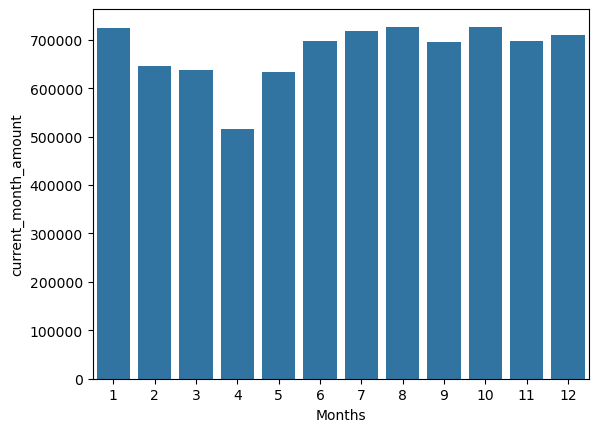

In [45]:
sns.barplot(x=df_MOM['Months'],y=df_MOM['current_month_amount'])
plt.show()

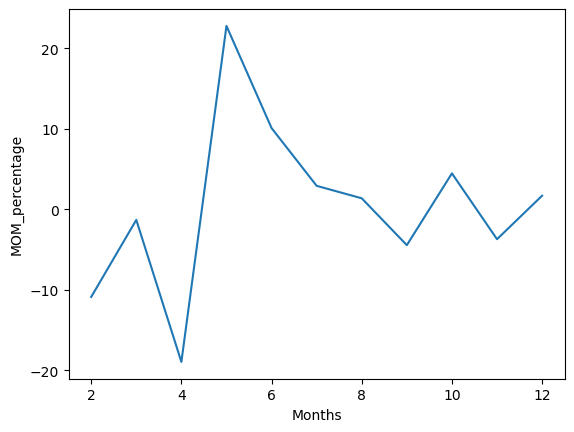

In [46]:
sns.lineplot(df_MOM,x=df_MOM['Months'],y=df_MOM['MOM_percentage'])
plt.show()

### **RFM Analysis**

In [48]:
query_5 = """select * from rfm_summ1"""

In [49]:
df_rfm=pd.read_sql(query_5,connection2)

In [52]:
df_rfm

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_segment,customer_segment
0,CS7333,181,4,149,1,1,1,111,Churned
1,CS8559,388,4,157,1,1,1,111,Churned
2,CS8234,85,5,157,2,1,1,211,Churned
3,CS8077,15,5,164,5,1,1,511,Medium Value
4,CS8841,218,5,181,1,1,1,111,Churned
...,...,...,...,...,...,...,...,...,...
6884,CS3799,151,36,2513,1,5,5,155,At Risk
6885,CS4660,10,33,2527,5,5,5,555,Champions
6886,CS5752,78,33,2612,2,5,5,255,At Risk
6887,CS4320,80,38,2647,2,5,5,255,At Risk


In [78]:
segment_counts = df_rfm.groupby('customer_segment')['customer_id'].count()
segment_percentage = (segment_counts / segment_counts.sum()) * 100

In [80]:
segment_counts

customer_segment
At Risk              1251
Big Spenders Lost       5
Champions            1220
Churned              1354
Loyal Customers      1516
Medium Value         1543
Name: customer_id, dtype: int64

In [79]:
segment_percentage

customer_segment
At Risk              18.159385
Big Spenders Lost     0.072579
Champions            17.709392
Churned              19.654522
Loyal Customers      22.006097
Medium Value         22.398026
Name: customer_id, dtype: float64

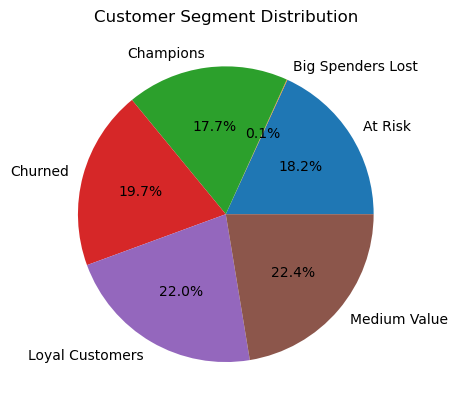

In [86]:
plt.pie(segment_counts,labels = segment_counts.index,autopct = '%.1f%%')
plt.title('Customer Segment Distribution')

plt.show()

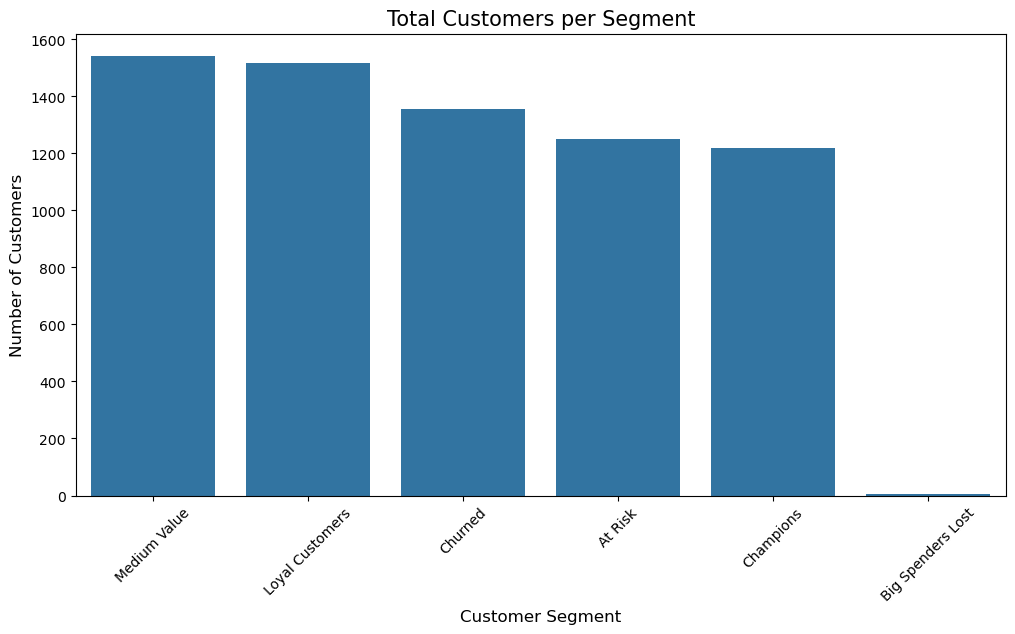

In [100]:
plt.figure(figsize=(12, 6))

# Count how many customers are in each segment
# We use .index to sort the bars from highest count to lowest
order = df_rfm['customer_segment'].value_counts().index

sns.countplot(data=df_rfm, x='customer_segment', order=order)

plt.title('Total Customers per Segment', fontsize=15)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### Quaterwise anaysis

In [58]:
query_6 = """ select DATEPART(QUARTER,trans_date) as Quarters,sum(tran_amount) as Total_spent from clean_merge_data
 group by DATEPART(QUARTER,trans_date)
 order by Quarters"""
df_qtr = pd.read_sql(query_6,connection2)

In [62]:
df_qtr

,Quarters,Total_spent
0,1,2005838
1,2,1846017
2,3,2138577
3,4,2133557


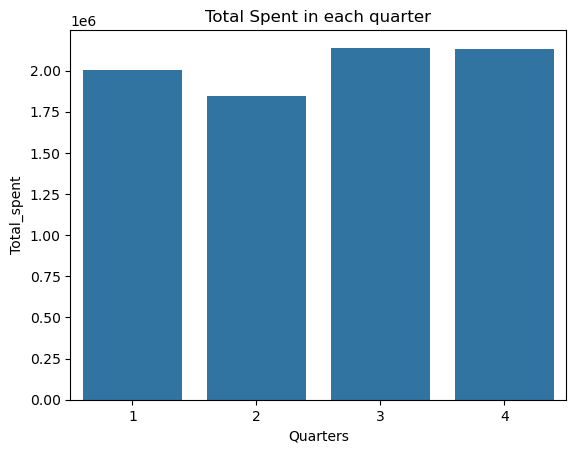

In [102]:
sns.barplot(x=df_qtr.Quarters,y=df_qtr.Total_spent)
plt.title('Total Spent in each quarter')
plt.show()


#### Day of Week Analysis

In [74]:
query_7 = """select DATENAME(Weekday,trans_date) as Day_name, sum(tran_amount) as Total_spent from clean_merge_data
group by DATENAME(Weekday,trans_date)"""
df_day = pd.read_sql(query_7,connection2)
df_day

,Day_name,Total_spent
0,Saturday,1164628
1,Wednesday,1170811
2,Monday,1163360
3,Sunday,1152457
4,Friday,1144095
5,Thursday,1159937
6,Tuesday,1168701


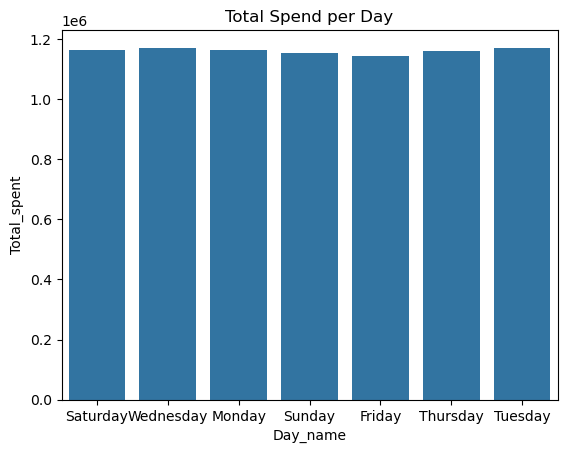

In [101]:
sns.barplot(x=df_day.Day_name,y=df_day.Total_spent)
plt.title('Total Spend per Day')
plt.show()